In [3]:
import xarray as xr

In [4]:
tem = xr.open_dataset("download.nc")
prec = xr.open_dataset("download1.nc")
soil = xr.open_dataset("download2.nc")

# Temperature

In [4]:
type(tem)

xarray.core.dataset.Dataset

In [5]:
tem.info()

xarray.Dataset {
dimensions:
	latitude = 1801 ;
	longitude = 3600 ;
	time = 31 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 t2m(time, latitude, longitude) ;
		t2m:units = K ;
		t2m:long_name = 2 metre temperature ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2020-08-29 15:53:09 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data4/adaptor.mars.internal-1598716378.3930478-27130-31-481c9f70-f91e-4193-b644-87ccbaa31a3a.nc /cache/tmp/481c9f70-f91e-4193-b644-87ccbaa31a3a-adaptor.mars.internal-1598716378.3935032-27130-10-tmp.grib ;
}

In [6]:
tem.dims

Frozen(SortedKeysDict({'longitude': 3600, 'latitude': 1801, 'time': 31}))

In [21]:
tem.isel(time=1)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
    time       datetime64[ns] 2019-12-02T12:00:00
Data variables:
    t2m        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-08-29 15:53:09 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [22]:
tem.isel(latitude=1)

<xarray.Dataset>
Dimensions:    (longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
    latitude   float32 89.9
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-08-29 15:53:09 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [23]:
tem.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      float32 268.24347

In [24]:
tem.mean(dim='time')

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
Data variables:
    t2m        (latitude, longitude) float32 nan nan nan ... 245.49562 245.49562

In [26]:
tem.mean(dim=['longitude','latitude'])

<xarray.Dataset>
Dimensions:  (time: 31)
Coordinates:
  * time     (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m      (time) float32 268.46548 268.12433 267.99905 ... 267.7623 267.84293

In [31]:
tem.std()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      float64 96.45

In [28]:
tem.median()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      float64 264.1

In [29]:
tem.max()-tem.min()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      float64 96.49

In [30]:
tem.count()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      int32 68598753

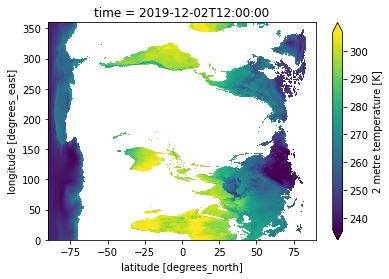

In [38]:
g = tem['t2m'].isel(time=1).plot.imshow('latitude','longitude',robust=True)
plt.draw()
#it can be concluded from the graph that the temperature is highest in the centres, along equators
#as the latitude decreases, the temperature also decreases
#this distribution is almost constant throughout the latitudes

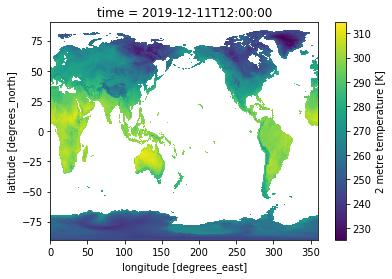

In [36]:
tem['t2m'].isel(time=10).plot()
#it can be concluded from the graph that the temperature is highest in the centres, along equators
#as the latitude decreases, the temperature also decreases
#this distribution is almost constant throughout the latitudes

In [46]:
#Original values at time=30 having null values
tem['t2m'].isel(time=30).to_pandas().head()

longitude,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,...,359.000000,359.100006,359.200012,359.299988,359.399994,359.500000,359.600006,359.700012,359.799988,359.899994
latitude,,,,,,,,,,,,,,,,,,,,,
90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.900002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.800003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.599998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Droppping all the null values
#From the output it can be concluded that the null value sare only along the latitudes, as the number of columns remained
#constant after dropping null values
tem['t2m'].isel(time=30).to_pandas().dropna().head()

longitude,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,...,359.000000,359.100006,359.200012,359.299988,359.399994,359.500000,359.600006,359.700012,359.799988,359.899994
latitude,,,,,,,,,,,,,,,,,,,,,
-78.500000,252.070862,252.036987,252.006073,251.975159,251.944229,251.910370,251.877975,251.839691,251.805832,251.770493,...,252.352081,252.324097,252.296127,252.268158,252.238708,252.212204,252.184235,252.154785,252.126801,252.098831
-78.599998,252.138580,252.107666,252.076752,252.045822,252.014908,251.982513,251.947174,251.910370,251.875031,251.838226,...,252.397720,252.371216,252.344711,252.318207,252.291718,252.266678,252.243118,252.216614,252.194534,252.166565
-78.699997,252.209259,252.178345,252.148895,252.119446,252.088531,252.059082,252.026688,251.991348,251.957489,251.922150,...,252.453674,252.428650,252.400665,252.374161,252.346191,252.322632,252.299072,252.275513,252.254898,252.231354
-78.800003,252.299072,252.268158,252.238708,252.207794,252.173920,252.141525,252.106201,252.072327,252.039932,252.006073,...,252.555267,252.525818,252.499313,252.469864,252.441895,252.413925,252.391830,252.368271,252.344711,252.321167
-78.900002,252.424225,252.391830,252.356491,252.318207,252.284348,252.249008,252.213684,252.178345,252.144470,252.110611,...,252.667160,252.640656,252.615631,252.592072,252.565567,252.539062,252.518463,252.494904,252.471344,252.449249


In [73]:
#Filling missing values with mean
mean = tem['t2m'].isel(time=30).to_pandas().mean()
pd = tem['t2m'].isel(time=30).to_pandas().fillna(mean)
pd.head()

longitude,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,...,359.000000,359.100006,359.200012,359.299988,359.399994,359.500000,359.600006,359.700012,359.799988,359.899994
latitude,,,,,,,,,,,,,,,,,,,,,
90.000000,278.073364,278.095764,278.107635,278.132233,278.080231,278.110901,278.13559,278.113983,278.143677,278.05426,...,278.613953,278.59726,278.558411,278.482941,278.421844,278.359863,278.342377,278.261993,278.201965,278.118896
89.900002,278.073364,278.095764,278.107635,278.132233,278.080231,278.110901,278.13559,278.113983,278.143677,278.05426,...,278.613953,278.59726,278.558411,278.482941,278.421844,278.359863,278.342377,278.261993,278.201965,278.118896
89.800003,278.073364,278.095764,278.107635,278.132233,278.080231,278.110901,278.13559,278.113983,278.143677,278.05426,...,278.613953,278.59726,278.558411,278.482941,278.421844,278.359863,278.342377,278.261993,278.201965,278.118896
89.699997,278.073364,278.095764,278.107635,278.132233,278.080231,278.110901,278.13559,278.113983,278.143677,278.05426,...,278.613953,278.59726,278.558411,278.482941,278.421844,278.359863,278.342377,278.261993,278.201965,278.118896
89.599998,278.073364,278.095764,278.107635,278.132233,278.080231,278.110901,278.13559,278.113983,278.143677,278.05426,...,278.613953,278.59726,278.558411,278.482941,278.421844,278.359863,278.342377,278.261993,278.201965,278.118896


# Total Precipitation

In [48]:
prec.info()

xarray.Dataset {
dimensions:
	latitude = 1801 ;
	longitude = 3600 ;
	time = 31 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 tp(time, latitude, longitude) ;
		tp:units = m ;
		tp:long_name = Total precipitation ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2020-08-29 16:04:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data7/adaptor.mars.internal-1598717053.3430946-19768-11-0c0cae22-de31-49dd-a3b3-fbe689154bfc.nc /cache/tmp/0c0cae22-de31-49dd-a3b3-fbe689154bfc-adaptor.mars.internal-1598717053.3436756-19768-4-tmp.grib ;
}

In [49]:
prec.dims

Frozen(SortedKeysDict({'longitude': 3600, 'latitude': 1801, 'time': 31}))

In [50]:
prec.isel(time=1)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
    time       datetime64[ns] 2019-12-02T12:00:00
Data variables:
    tp         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-08-29 16:04:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [51]:
prec.isel(longitude=900)

<xarray.Dataset>
Dimensions:    (latitude: 1801, time: 31)
Coordinates:
    longitude  float32 90.0
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    tp         (time, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-08-29 16:04:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [52]:
prec.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float32 0.00069311797

In [53]:
prec.mean(dim='time')

C:\Users\Lenovo\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
Data variables:
    tp         (latitude, longitude) float32 nan nan ... 5.204783e-05

In [55]:
prec.mean(dim=['latitude','longitude'])

<xarray.Dataset>
Dimensions:  (time: 31)
Coordinates:
  * time     (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    tp       (time) float32 0.00076649373 0.00076209765 ... 0.0007762063

In [56]:
prec.std()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float64 0.002498

In [57]:
#Median
prec.median()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float64 1.67e-05

In [58]:
#Range
prec.max()-prec.min()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float64 0.2189

In [59]:
prec.count()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       int32 68598753

In [90]:
#Total value on day 1
prec['tp'].isel(time=1).shape

(1801, 3600)

In [89]:
prec['tp'].isel(time=1).to_pandas().head()

longitude,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,...,359.000000,359.100006,359.200012,359.299988,359.399994,359.500000,359.600006,359.700012,359.799988,359.899994
latitude,,,,,,,,,,,,,,,,,,,,,
90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.900002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.800003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89.599998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Not null values on day 1
prec['tp'].isel(time=1).to_pandas().dropna().shape


(116, 3600)

In [69]:
#After filling null values with mean 
mean = prec['tp'].isel(time=1).to_pandas().mean()
pd = prec['tp'].isel(time=1).to_pandas().fillna(mean)
pd.shape

(1801, 3600)

In [91]:
pd.head()

longitude,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,...,359.000000,359.100006,359.200012,359.299988,359.399994,359.500000,359.600006,359.700012,359.799988,359.899994
latitude,,,,,,,,,,,,,,,,,,,,,
90.000000,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848
89.900002,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848
89.800003,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848
89.699997,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848
89.599998,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848


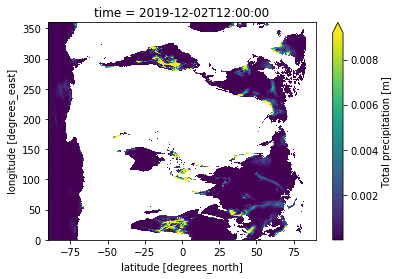

In [70]:
g = prec['tp'].isel(time=1).plot.imshow('latitude','longitude',robust=True)
plt.draw()
#it is clear from the graphs that the values are very negatively skewed and it makes it 

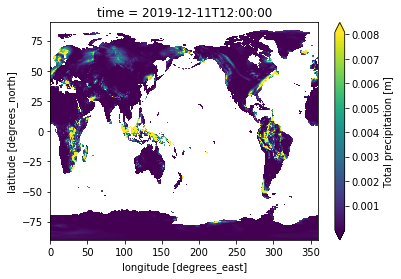

In [5]:
prec['tp'].isel(time=10).plot(robust=True)
#the graph is highly skewed and it is quite difficult to differentiate the values

# Soil Water

In [74]:
soil.info()

xarray.Dataset {
dimensions:
	latitude = 1801 ;
	longitude = 3600 ;
	time = 31 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 tp(time, latitude, longitude) ;
		tp:units = m ;
		tp:long_name = Total precipitation ;
	float32 swvl1(time, latitude, longitude) ;
		swvl1:units = m**3 m**-3 ;
		swvl1:long_name = Volumetric soil water layer 1 ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2020-08-23 17:40:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data5/adaptor.mars.internal-1598204402.2707257-8018-39-36f170dd-6225-4e18-9b98-814d0f014e10.nc /cache/tmp/36f170dd-6225-4e18-9b98-814d0f014e10-adaptor.mars.internal-1598204402.2714841-8018-7-tmp.grib ;
}

In [75]:
soil.dims

Frozen(SortedKeysDict({'longitude': 3600, 'latitude': 1801, 'time': 31}))

In [77]:
soil.isel(time=1)

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
    time       datetime64[ns] 2019-12-02T12:00:00
Data variables:
    tp         (latitude, longitude) float32 ...
    swvl1      (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-08-23 17:40:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [76]:
soil.isel(latitude=100)

<xarray.Dataset>
Dimensions:    (longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
    latitude   float32 80.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    tp         (time, longitude) float32 ...
    swvl1      (time, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-08-23 17:40:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [78]:
#Mean
soil.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float32 0.00069311797
    swvl1    float32 0.2649494

In [79]:
soil.mean(dim=['latitude','longitude'])

<xarray.Dataset>
Dimensions:  (time: 31)
Coordinates:
  * time     (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    tp       (time) float32 0.00076649373 0.00076209765 ... 0.0007762063
    swvl1    (time) float32 0.26458976 0.26438114 ... 0.26454106 0.26435217

In [80]:
#Median
soil.median()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float64 1.67e-05
    swvl1    float64 0.2716

In [83]:
#Standard deviation
soil.std()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float64 0.002498
    swvl1    float64 0.1656

In [82]:
#Range
soil.max()-soil.min()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       float64 0.2189
    swvl1    float64 0.766

In [84]:
soil.count()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    tp       int32 68598753
    swvl1    int32 68598753

In [85]:
#Total value on day 1
soil['swvl1'].isel(time=1).shape

(1801, 3600)

In [86]:
#Not null values on day 1
soil['swvl1'].isel(time=1).to_pandas().dropna().shape

(116, 3600)

In [87]:
#After filling null values with mean 
mean = soil['swvl1'].isel(time=1).to_pandas().mean()
pd = soil['swvl1'].isel(time=1).to_pandas().fillna(mean)
pd.shape

(1801, 3600)

In [92]:
pd.head()

longitude,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,...,359.000000,359.100006,359.200012,359.299988,359.399994,359.500000,359.600006,359.700012,359.799988,359.899994
latitude,,,,,,,,,,,,,,,,,,,,,
90.000000,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848
89.900002,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848
89.800003,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848
89.699997,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848
89.599998,0.183303,0.184338,0.186014,0.188185,0.187608,0.187447,0.184456,0.183376,0.181479,0.178755,...,0.196193,0.196239,0.195605,0.195885,0.195246,0.19469,0.194038,0.192062,0.18873,0.185848


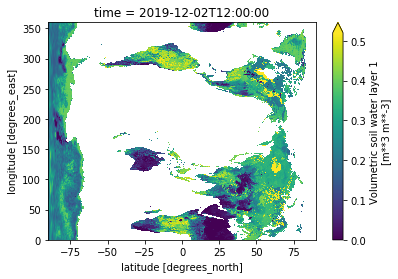

In [100]:
g = soil['swvl1'].isel(time=1).plot.imshow('latitude','longitude',robust=True)
plt.draw()

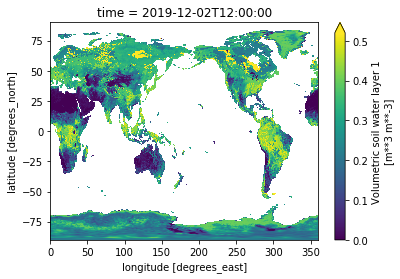

In [99]:
soil['swvl1'].isel(time=1).plot(robust=True)
#the volumetric soil water layer is minimum near equators
#it is normal at the poles
#it is least in tropical zones